## ACTD 2024 - 20

### Clases 11-12: Introducción a redes neuronales

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida

Empecemos importando numpy y pandas

In [2]:
import numpy as np
import pandas as pd

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [3]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [4]:
df=df.drop(["Origin"], axis=1)
df


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [5]:
df.shape

(398, 7)

Identificamos NAs en los datos

In [6]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


Separamos los datos en entrenamiento y prueba

In [9]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
125,20.0,6,198.0,95.0,3102.0,16.5,74
142,26.0,4,79.0,67.0,1963.0,15.5,74
278,31.5,4,89.0,71.0,1990.0,14.9,78
254,20.2,6,200.0,85.0,2965.0,15.8,78
328,30.0,4,146.0,67.0,3250.0,21.8,80


In [10]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
8,14.0,8,455.0,225.0,4425.0,10.0,70
13,14.0,8,455.0,225.0,3086.0,10.0,70


In [11]:
print(train.shape)
print(test.shape)

(314, 7)
(78, 7)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [12]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [13]:
import seaborn as sns

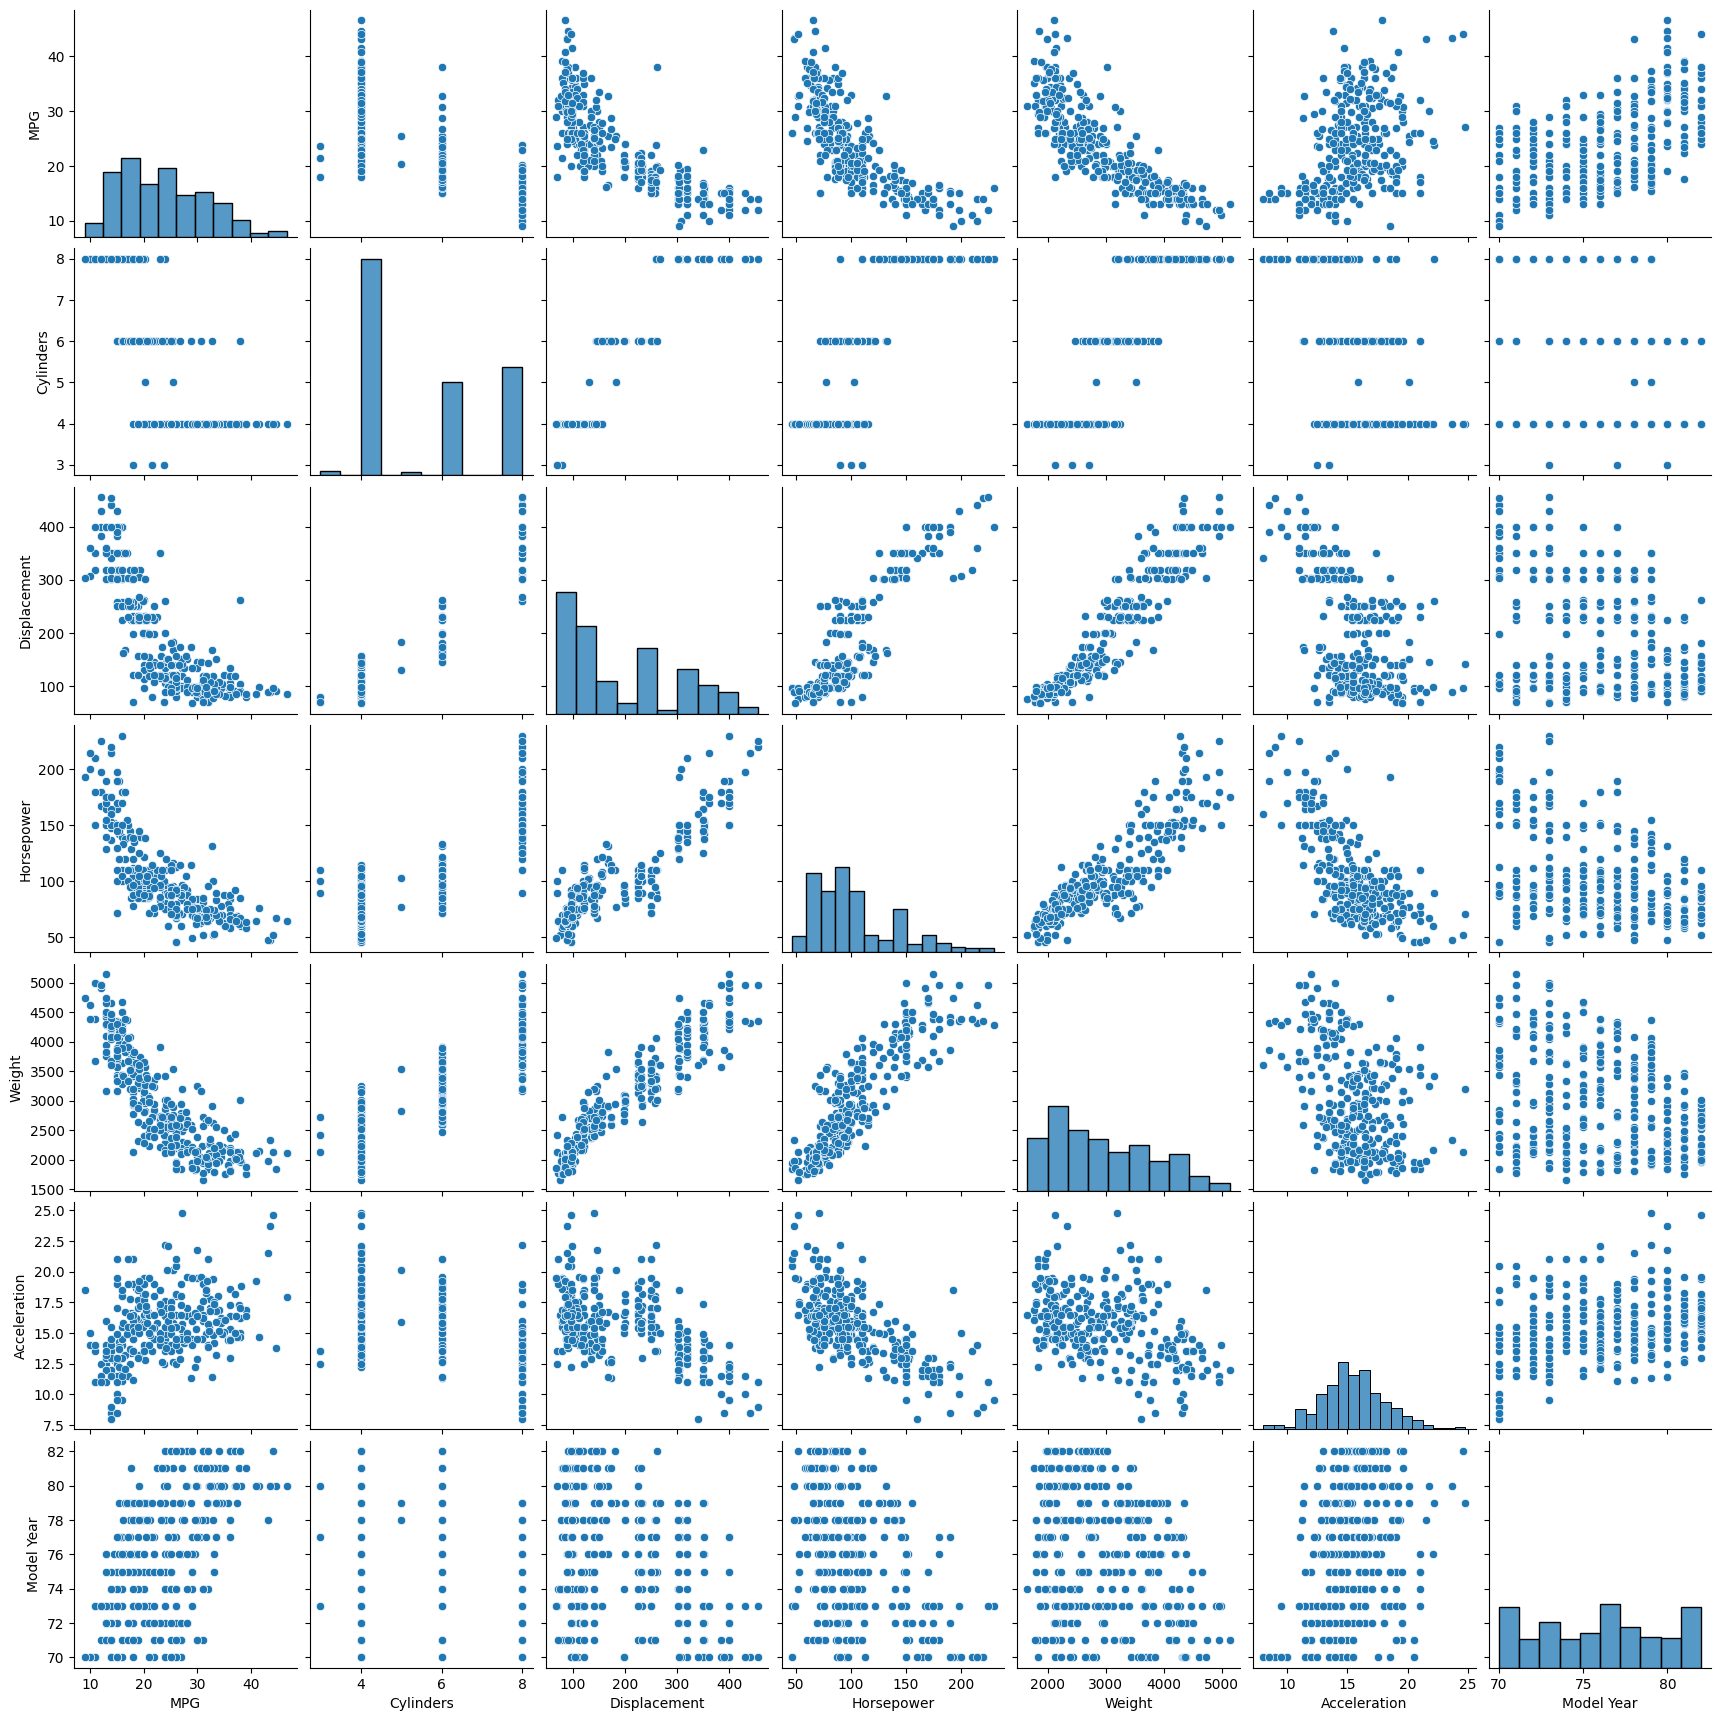

In [14]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [15]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
MPG,1.000000,-0.777230,-0.807032,-0.775493,-0.832793,0.389422,0.596816
Cylinders,-0.777230,1.000000,0.950858,0.849237,0.901259,-0.488703,-0.330668
Displacement,-0.807032,0.950858,1.000000,0.893640,0.941913,-0.523473,-0.364236
Horsepower,-0.775493,0.849237,0.893640,1.000000,0.875157,-0.672989,-0.414065
Weight,-0.832793,0.901259,0.941913,0.875157,1.000000,-0.402870,-0.318231
Acceleration,0.389422,-0.488703,-0.523473,-0.672989,-0.402870,1.000000,0.258013
Model Year,0.596816,-0.330668,-0.364236,-0.414065,-0.318231,0.258013,1.000000


<Axes: >

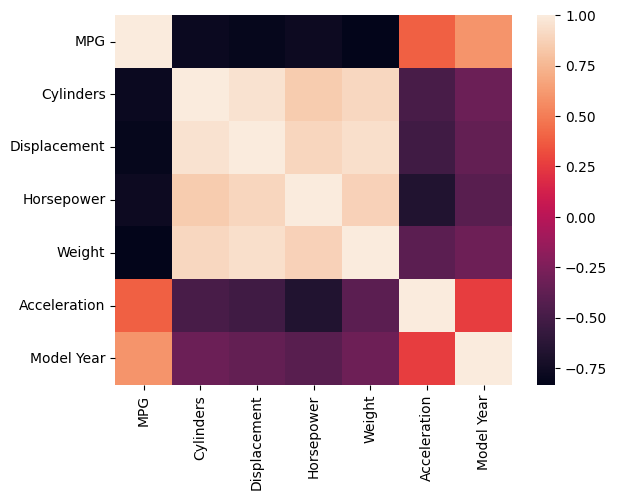

In [16]:
sns.heatmap(train.corr())

Seleccionamos ahora las características y las etiquetas (MPG)

In [17]:
train_X = train.copy()
test_X = test.copy()

In [18]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [19]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
125,6,198.0,95.0,3102.0,16.5,74
142,4,79.0,67.0,1963.0,15.5,74
278,4,89.0,71.0,1990.0,14.9,78
254,6,200.0,85.0,2965.0,15.8,78
328,4,146.0,67.0,3250.0,21.8,80


In [20]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [21]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
dtype: object

Construyamos los modelos usando tensorflow

In [22]:
import tensorflow as tf

In [23]:
tf.__version__

'2.17.0'

Capa de normalización

In [24]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [25]:
norm = tf.keras.layers.Normalization()

In [26]:
norm.adapt(np.array(train_X))

In [27]:
norm.mean.numpy()

array([[   5.455414,  192.5621  ,  103.76752 , 2959.312   ,   15.518472,
          75.964966]], dtype=float32)

In [28]:
norm.variance.numpy()

array([[2.8531077e+00, 1.0719739e+04, 1.4487772e+03, 7.3190656e+05,
        7.2942448e+00, 1.3441448e+01]], dtype=float32)

In [29]:
np.sqrt(norm.variance.numpy())

array([[  1.6891145, 103.53617  ,  38.062805 , 855.5154   ,   2.7007859,
          3.666258 ]], dtype=float32)

In [30]:
train_X[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
125,6,198.0,95.0,3102.0,16.5,74


In [31]:
norm(train_X[:1]).numpy()

array([[ 0.32240927,  0.05252171, -0.23034343,  0.166786  ,  0.36342323,
        -0.5359595 ]], dtype=float32)

## Modelo con múltiples variables de entrada

In [72]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [73]:
linear_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [74]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [75]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 23.7425 - val_loss: 21.7727
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.9247 - val_loss: 21.0683
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.4088 - val_loss: 20.4097
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.3154 - val_loss: 19.7284
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.1152 - val_loss: 19.0178
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.0332 - val_loss: 18.2775
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.4960 - val_loss: 17.6497
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.9871 - val_loss: 17.0341
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.7610 - val_loss: 16.3567
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.3044 - val_loss: 15.5610
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.0924 - val_loss: 14.9413
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step -

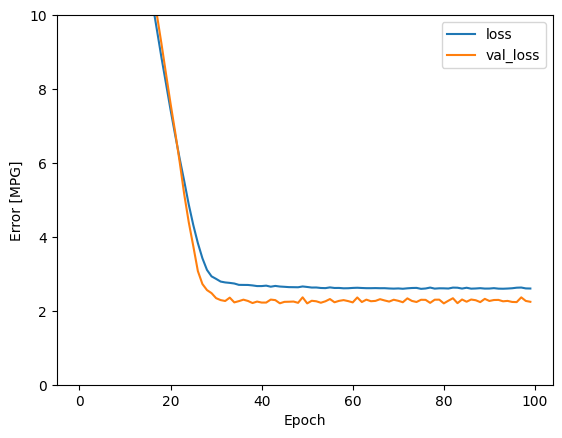

In [76]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [77]:
test_res['linear_model'] = linear_model.evaluate(
    test_X, test_y, verbose=0)

In [78]:
test_res

{'h_model': 3.6814887523651123,
 'dnn_h_model': 3.061788320541382,
 'variacion1_model': 3.136021137237549,
 'variacion2_model': 2.999600648880005,
 'variacion3_model': 2.9899914264678955,
 'linear_model': 2.74725604057312,
 'dnn_model': 2.3172435760498047}

In [79]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

# variacion 1
variacion1_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


# variacion 2
variacion2_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


# variacion 3
variacion3_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [80]:
dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

# variacion 1
variacion1_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


# variacion 2
variacion2_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


# variacion 3
variacion3_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [81]:
dnn_model.summary()

# variacion 1
variacion1_model.summary()


# variacion 2
variacion2_model.summary()


# variacion 3
variacion3_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [82]:
%%time
history_original = dnn_model.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

  # variacion 1
history_variacion1 = variacion1_model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=100)


# variacion 2
history_variacion2 = variacion2_model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=100)

# variacion 3
history_variacion3 = variacion3_model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 23.6262 - val_loss: 21.8679
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.7974 - val_loss: 21.2242
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.7278 - val_loss: 20.4452
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.1757 - val_loss: 19.4390
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.8941 - val_loss: 18.0715
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.8021 - val_loss: 16.2569
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.3203 - val_loss: 14.3101
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.0714 - val_loss: 12.4632
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.1442 - val_loss: 10.2945
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.2310 - val_loss: 7.5459
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.2235 - val_loss: 4.6601
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

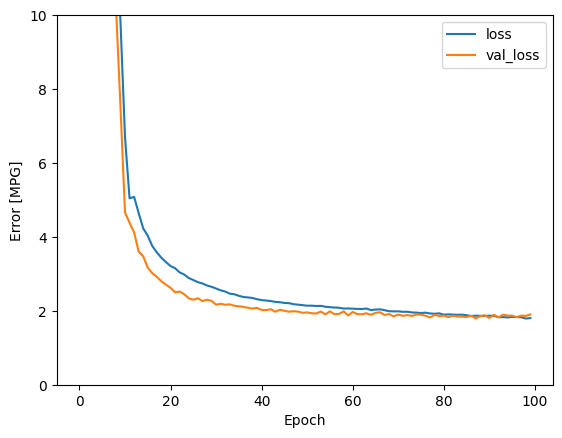

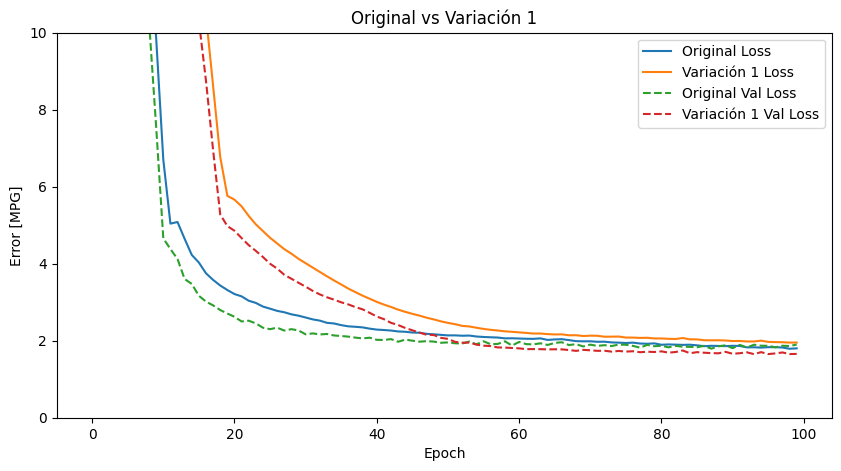

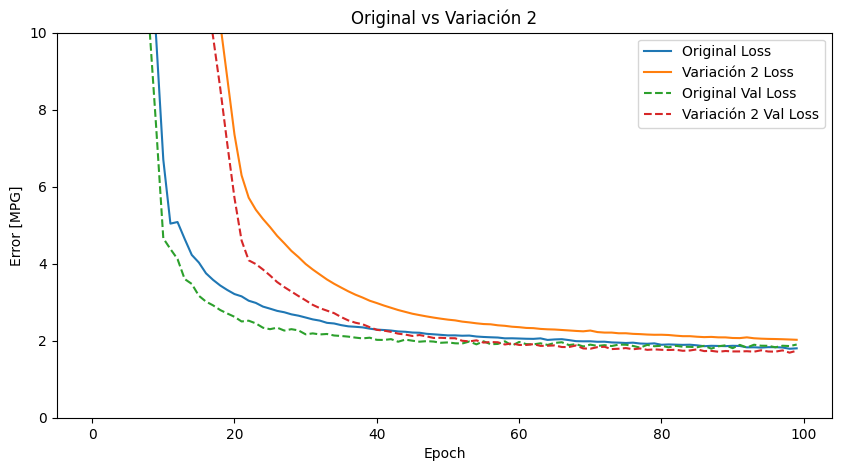

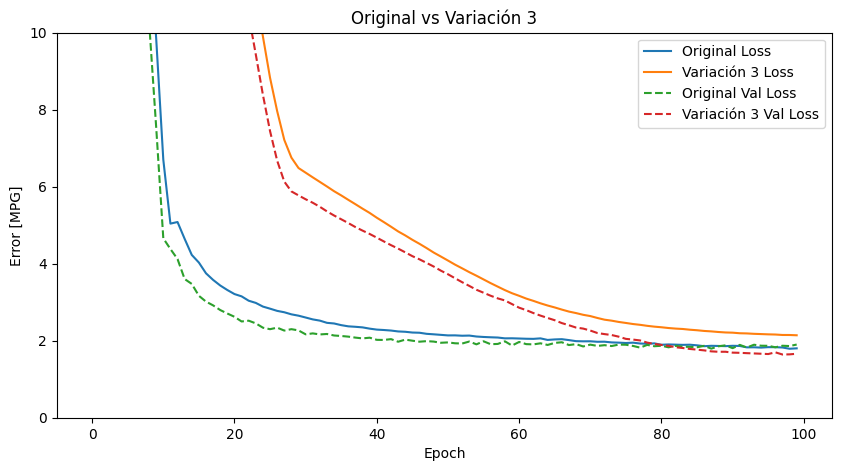

In [90]:
plt.plot(history_original.history['loss'], label='loss')
plt.plot(history_original.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()


# Comparar Original vs Variación 1
plt.figure(figsize=(10, 5))
plt.plot(history_original.history['loss'], label='Original Loss')
plt.plot(history_variacion1.history['loss'], label='Variación 1 Loss')
plt.plot(history_original.history['val_loss'], '--', label='Original Val Loss')
plt.plot(history_variacion1.history['val_loss'], '--', label='Variación 1 Val Loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Original vs Variación 1')
plt.legend()
plt.show()

# Comparar Original vs Variación 2
plt.figure(figsize=(10, 5))
plt.plot(history_original.history['loss'], label='Original Loss')
plt.plot(history_variacion2.history['loss'], label='Variación 2 Loss')
plt.plot(history_original.history['val_loss'], '--', label='Original Val Loss')
plt.plot(history_variacion2.history['val_loss'], '--', label='Variación 2 Val Loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Original vs Variación 2')
plt.legend()
plt.show()

# Comparar Original vs Variación 3
plt.figure(figsize=(10, 5))
plt.plot(history_original.history['loss'], label='Original Loss')
plt.plot(history_variacion3.history['loss'], label='Variación 3 Loss')
plt.plot(history_original.history['val_loss'], '--', label='Original Val Loss')
plt.plot(history_variacion3.history['val_loss'], '--', label='Variación 3 Val Loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Original vs Variación 3')
plt.legend()
plt.show()


In [91]:
test_res['dnn_model'] = dnn_model.evaluate(test_X, test_y, verbose=0)

# variacion 1
test_res['variacion1_model'] = dnn_model.evaluate(test_X, test_y, verbose=0)


# variacion 2
test_res['variacion2_model'] = dnn_model.evaluate(test_X, test_y, verbose=0)

# variacion 3
test_res['variacion3_model'] = dnn_model.evaluate(test_X, test_y, verbose=0)

In [94]:
test_res

{'h_model': 3.6814887523651123,
 'dnn_h_model': 3.061788320541382,
 'variacion1_model': 2.283916473388672,
 'variacion2_model': 2.283916473388672,
 'variacion3_model': 2.283916473388672,
 'linear_model': 2.74725604057312,
 'dnn_model': 2.283916473388672}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


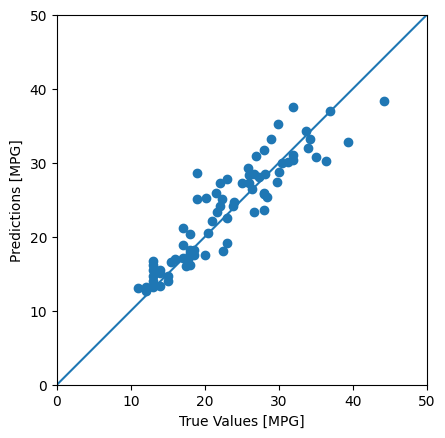

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


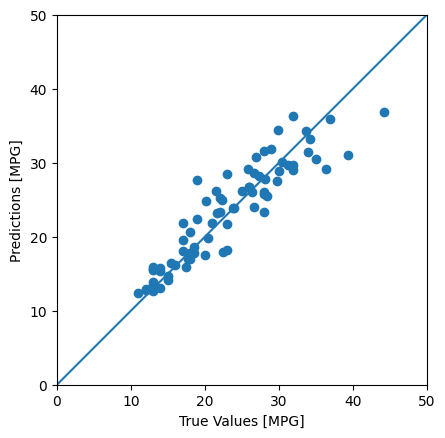

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


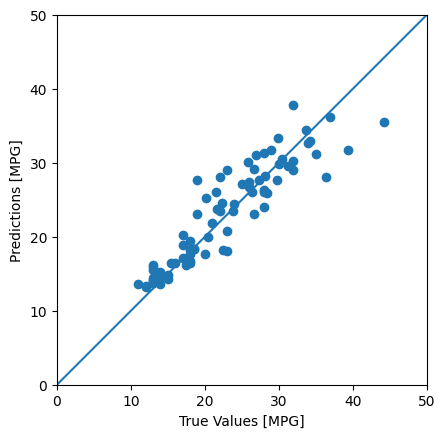

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


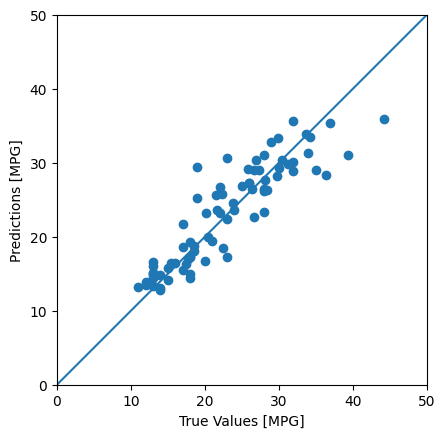

In [100]:
test_pred = dnn_model.predict(test_X).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()

# variacion 1
test_pred = variacion1_model.predict(test_X).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()

# variacion 2
test_pred = variacion2_model.predict(test_X).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()

# variacion 3
test_pred = variacion3_model.predict(test_X).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()